In [376]:
import pandas as pd

In [ ]:
df = pd.read_csv('Leads.csv')

In [378]:
og_size =  df.shape[0]

In [379]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [381]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning Data

## Replacing select with nan since it implies the entry was not filled

In [382]:
import numpy as np
df = df.replace('Select', np.nan)

In [383]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Lets go through the na value columns

In [384]:
#dropping all pointless columns with na value> 40%
df = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [385]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### We cannot keep dropping columns since that will cost us data, instead we will fill those values with unknown

In [386]:
for i in ['Country', 'What is your current occupation','Specialization','What matters most to you in choosing a course']:
    df[i] = df[i].fillna('Others')

In [387]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

### Lets look at the new null values before moving onto others

In [388]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [389]:
### drop all rows which have occurences less than Facebook

value_counts = df['Lead Source'].value_counts()
values_to_keep = value_counts[value_counts >= 55].index.tolist()
df = df[df['Lead Source'].isin(values_to_keep)]

In [390]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.416739
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.416739
Last Activity                                    1.100697
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [391]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3422
SMS Sent                        2719
Olark Chat Conversation          972
Page Visited on Website          631
Converted to Lead                426
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       92
Unsubscribed                      58
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [392]:
##Drop values less than Phone Conversation
value_counts = df['Last Activity'].value_counts()
values_to_keep = value_counts[value_counts >= 30].index.tolist()
df = df[df['Last Activity'].isin(values_to_keep)]

In [393]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.276121
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.276121
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

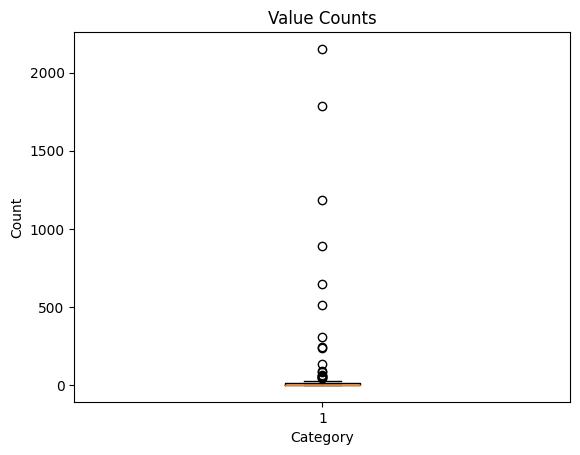

In [394]:
import matplotlib.pyplot as plt

plt.boxplot(df['Page Views Per Visit'].value_counts())

# Set plot title and labels
plt.title('Value Counts')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

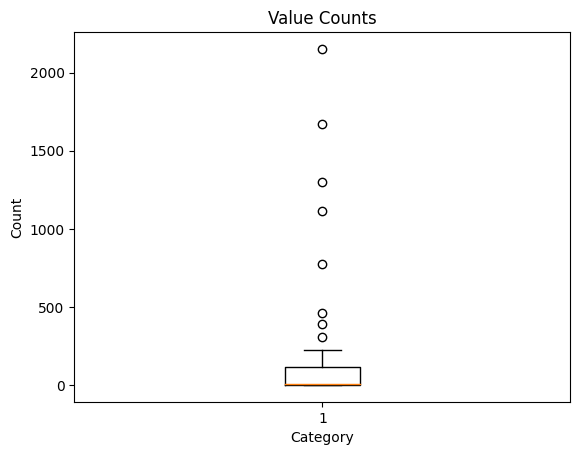

In [395]:
import matplotlib.pyplot as plt

plt.boxplot(df['TotalVisits'].value_counts())

# Set plot title and labels
plt.title('Value Counts')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [396]:
### We should drop outliers in both and replace nan values with mode

df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].mode())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode())


percentiles = df['TotalVisits'].quantile([0.05, 0.95]).values
lower_bound, upper_bound = percentiles
filtered_df = df[~df['TotalVisits'].between(lower_bound, upper_bound)]
df.loc[filtered_df.index, 'TotalVisits'] = lower_bound if filtered_df['TotalVisits'].lt(lower_bound).any() else upper_bound

percentiles = df['Page Views Per Visit'].quantile([0.05, 0.95]).values
lower_bound, upper_bound = percentiles
filtered_df = df[~df['Page Views Per Visit'].between(lower_bound, upper_bound)]
df.loc[filtered_df.index, 'Page Views Per Visit'] = lower_bound if filtered_df['Page Views Per Visit'].lt(lower_bound).any() else upper_bound


In [397]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [398]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6359
Others                       2693
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [399]:
### Inference: The 'Others' entry here is 'Better Career Prospects' as well, so we will drop it
df = df.drop(['What matters most to you in choosing a course'], axis = 1)

In [400]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5461
Others                  2675
Working Professional     680
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [401]:
###Imputing Others with Unemployed since that that is the most common category and probably the most likely value
df['What is your current occupation'] = df['What is your current occupation'].replace('Others', 'Unemployed')

In [402]:
df['Country'].value_counts()

Country
India                   6459
Others                  2311
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              19
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     3
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [403]:
### Replace others with India as well, since other counries are not as commonly present
df['Country'] = df['Country'].replace('Others', 'India')

In [404]:
(len(df.index)/og_size)*100

97.98701298701299

# Data Analysis

In [405]:
(sum(df['Converted'])/len(df['Converted'].index))*100

37.86171857742434

IndexError: index 5 is out of bounds for axis 0 with size 5

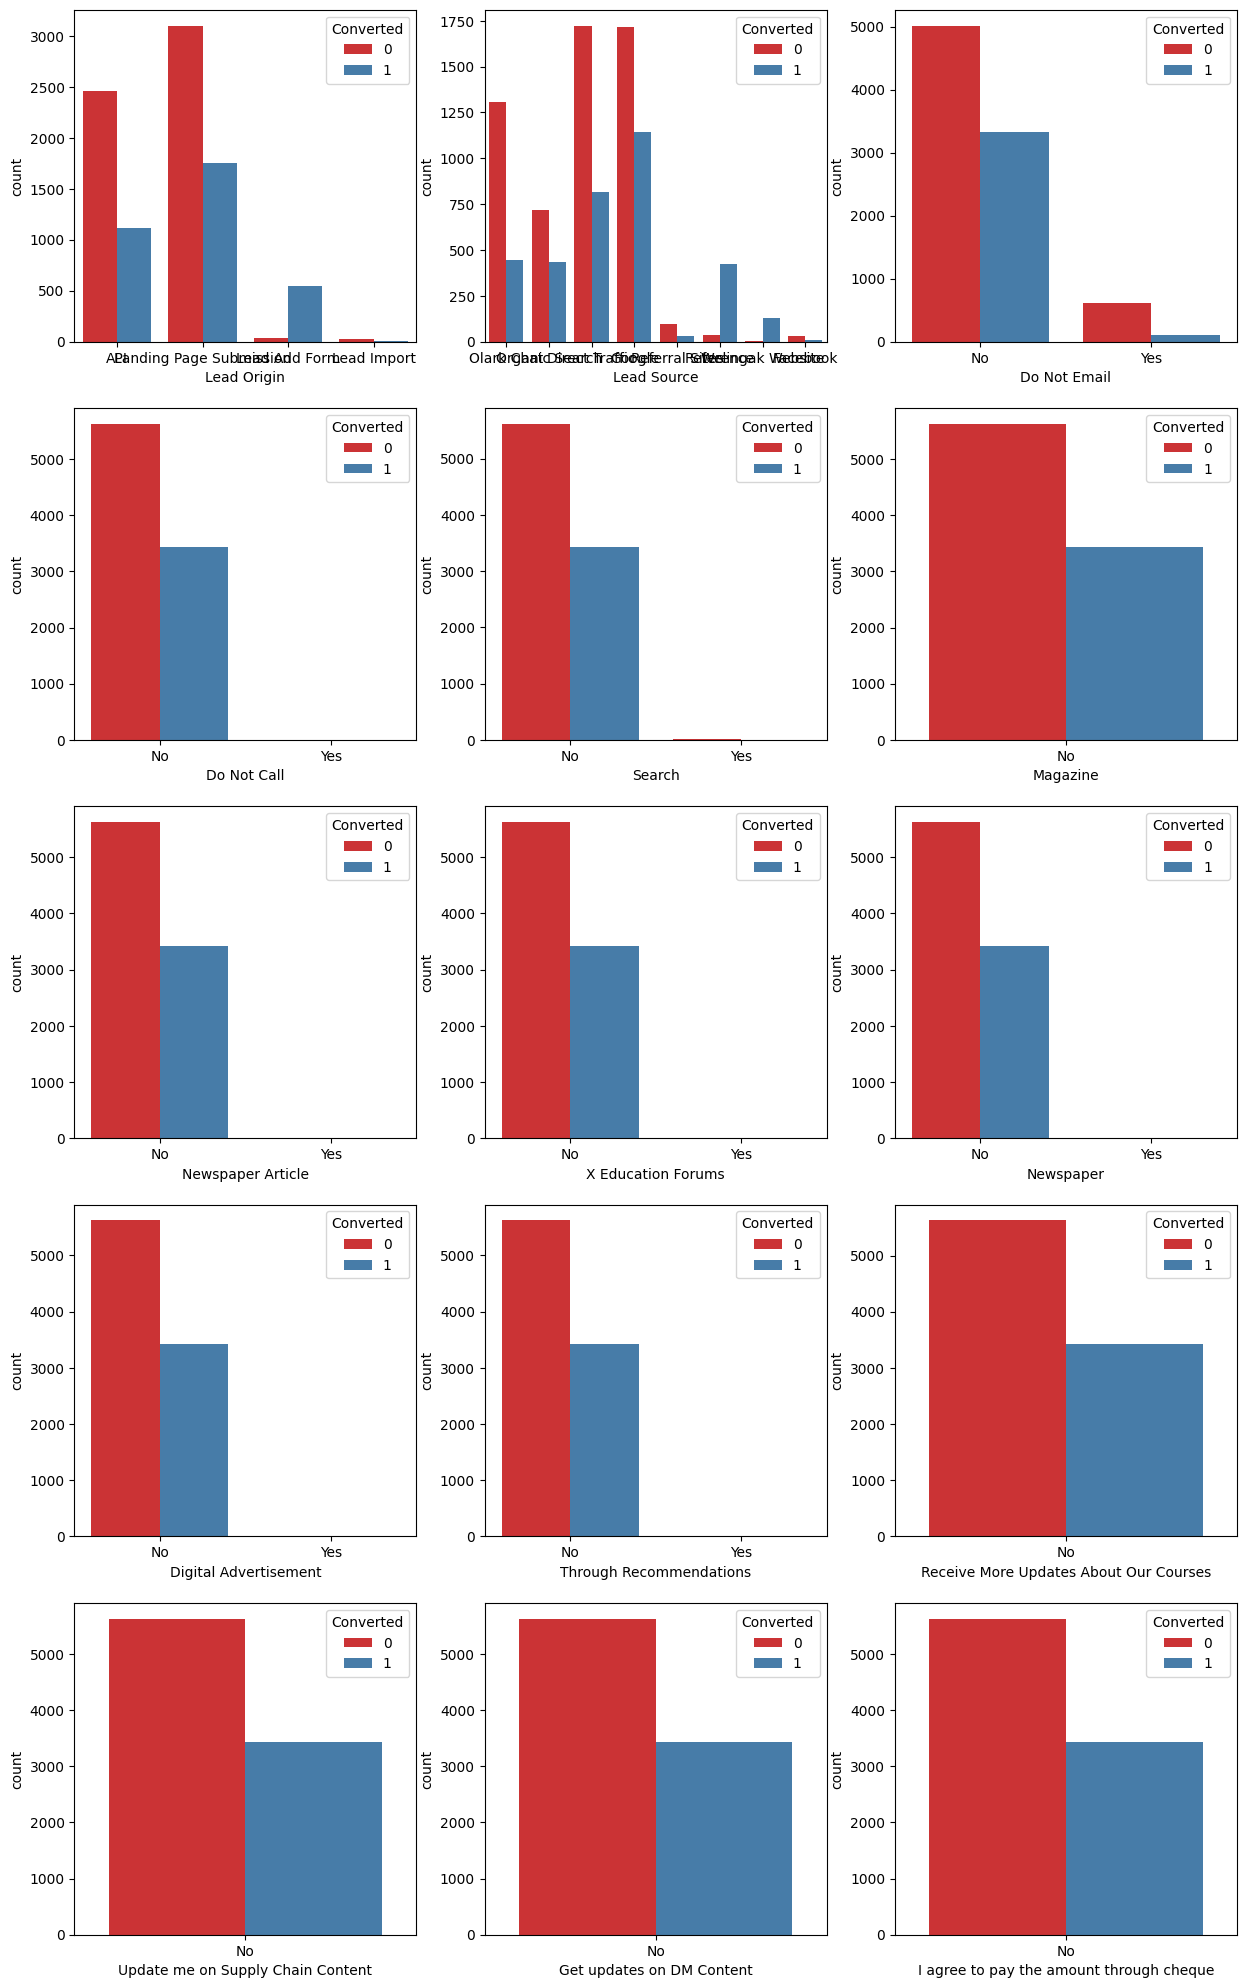

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'df' DataFrame loaded

# Create the figure with subplots arranged in a grid
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

# Plot individual countplots without a loop

# First row
sns.countplot(x="Lead Origin", hue="Converted", data=df, palette="Set1", ax=axs[0, 0])
sns.countplot(x="Lead Source", hue="Converted", data=df, palette="Set1", ax=axs[0, 1])
sns.countplot(x="Do Not Email", hue="Converted", data=df, palette="Set1", ax=axs[0, 2])

# Second row
sns.countplot(x="Do Not Call", hue="Converted", data=df, palette="Set1", ax=axs[1, 0])
sns.countplot(x="Search", hue="Converted", data=df, palette="Set1", ax=axs[1, 1])
sns.countplot(x="Magazine", hue="Converted", data=df, palette="Set1", ax=axs[1, 2])

# Third row
sns.countplot(x="Newspaper Article", hue="Converted", data=df, palette="Set1", ax=axs[2, 0])
sns.countplot(x="X Education Forums", hue="Converted", data=df, palette="Set1", ax=axs[2, 1])
sns.countplot(x="Newspaper", hue="Converted", data=df, palette="Set1", ax=axs[2, 2])

# Fourth row
sns.countplot(x="Digital Advertisement", hue="Converted", data=df, palette="Set1", ax=axs[3, 0])
sns.countplot(x="Through Recommendations", hue="Converted", data=df, palette="Set1", ax=axs[3, 1])
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=df, palette="Set1", ax=axs[3, 2])

# Fifth row
sns.countplot(x="Update me on Supply Chain Content", hue="Converted", data=df, palette="Set1", ax=axs[4, 0])
sns.countplot(x="Get updates on DM Content", hue="Converted", data=df, palette="Set1", ax=axs[4, 1])
sns.countplot(x="I agree to pay the amount through cheque", hue="Converted", data=df, palette="Set1", ax=axs[4, 2])

# Sixth row
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=df, palette="Set1", ax=axs[5, 0])

# Last row
sns.countplot(x="Last Notable Activity", hue="Converted", data=df, palette="Set1", ax=axs[5, 1])

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## Clearly, Lead source and lead origin are some of our important variables
## Many of the column such as Lead Number, Tags are extremely skewed and thus , as such we will be dropping all of them

In [407]:
df = df.drop(['Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)


In [408]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

# Preparing Data

In [409]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [410]:
df.dtypes

Prospect ID                         object
Lead Origin                         object
Lead Source                         object
Do Not Email                         int64
Do Not Call                          int64
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
Last Activity                       object
Specialization                      object
What is your current occupation     object
Last Notable Activity               object
dtype: object

In [411]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity']], drop_first=True)
dummy.head()
df = pd.concat([df, dummy], axis=1)
df.head()

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity'], axis = 1)

for i in df.columns:
    if i!='Prospect ID':
        if df[i].dtype == 'bool':
            df[i] = df[i].astype(int)

In [412]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [413]:
X.dtypes

Do Not Email                                              int64
Do Not Call                                               int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                       int64
Lead Origin_Lead Add Form                                 int64
Lead Origin_Lead Import                                   int64
Lead Source_Facebook                                      int64
Lead Source_Google                                        int64
Lead Source_Olark Chat                                    int64
Lead Source_Organic Search                                int64
Lead Source_Reference                                     int64
Lead Source_Referral Sites                                int64
Lead Source_Welingak Website                              int64
Last Activity_Email Bounced             

In [414]:
# Putting target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Feature Scaling

In [415]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [416]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2250,0,0,-0.072479,-0.692862,0.418408,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6895,0,0,-0.072479,-0.784650,0.418408,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2198,0,0,-0.072479,0.594009,0.418408,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4046,0,0,-1.136499,-0.878274,-1.258911,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1611,0,0,0.636867,-0.327545,1.536620,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## RFE

In [417]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [418]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachabl

In [419]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Creating model

In [420]:
import statsmodels.api as sm


In [421]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.8
Date:                Sat, 28 Sep 2024   Deviance:                       5243.7
Time:                        19:05:20   Pearson chi2:                 6.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2973      0.252     -1.180      0.238      -0.791       0.196
Do Not Email                                            -1.3054      0.190     -6.879      0.000      -1.677      -0.933
Total Time Spent on Website                              1.0647      0.040     26.613      0.000       0.986       1.143
Lead Origin_Landing Page Submission                     -1.1295      0.128     -8.819      0.000      -1.381      -0.879
Lead Origin_Lead Add Form                                0.6087      1.467      0.415      0.678      -2.267       3.484
Lead Source_Olark Chat                                   1.0372      0.121      8.551      0.000       0.799       1.275
Lead Source_Reference                                    2.5630      1.481      1.731      0.083      -0.339       5.465
Lead Source_Welingak Website                             5.0131      1.638      3.061      0.002       1.804       8.223
Last Activity_Email Opened                               0.6940      0.107      6.498      0.000       0.485       0.903
Last Activity_Had a Phone Conversation                  -0.0271      0.865     -0.031      0.975      -1.722       1.668
Last Activity_Olark Chat Conversation                   -0.9076      0.187     -4.858      0.000      -1.274      -0.541
Last Activity_SMS Sent                                   0.7057      0.160      4.406      0.000       0.392       1.020
Last Activity_Unsubscribed                               1.2778      0.466      2.742      0.006       0.364       2.191
Specialization_Others                                   -1.1613      0.125     -9.322      0.000      -1.405      -0.917
Specialization_Retail Management                        -0.7861      0.345     -2.277      0.023      -1.463      -0.110
What is your current occupation_Housewife               21.6032   1.71e+04      0.001      0.999   -3.35e+04    3.36e+04
What is your current occupation_Unemployed              -0.5889      0.213     -2.759      0.006      -1.007      -0.171
What is your current occupation_Working Professional     1.8718      0.276      6.781      0.000       1.331       2.413
Last Notable Activity_Had a Phone Conversation           3.8157      1.416      2.695      0.007       1.040       6.591
Last Notable Activity_SMS Sent                           1.4566      0.148      9.869      0.000       1.167       1.746
Last Notable Activity_Unreachable                        2.4799      0.537      4.621      0.000       1.428       3.532
========================================================================================================================
"""

In [422]:
###high p-value dropping

col1 = cols.drop('What is your current occupation_Housewife')

In [423]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Sat, 28 Sep 2024   Deviance:                       5247.2
Time:                        19:06:21   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2389      0.248     -0.962      0.336      -0.726       0.248
Do Not Email                                            -1.3094      0.190     -6.900      0.000      -1.681      -0.938
Total Time Spent on Website                              1.0653      0.040     26.637      0.000       0.987       1.144
Lead Origin_Landing Page Submission                     -1.1301      0.128     -8.829      0.000      -1.381      -0.879
Lead Origin_Lead Add Form                                0.6090      1.467      0.415      0.678      -2.267       3.485
Lead Source_Olark Chat                                   1.0374      0.121      8.552      0.000       0.800       1.275
Lead Source_Reference                                    2.5732      1.481      1.738      0.082      -0.329       5.475
Lead Source_Welingak Website                             5.0156      1.638      3.063      0.002       1.806       8.225
Last Activity_Email Opened                               0.6886      0.107      6.460      0.000       0.480       0.897
Last Activity_Had a Phone Conversation                  -0.0345      0.866     -0.040      0.968      -1.731       1.662
Last Activity_Olark Chat Conversation                   -0.9146      0.187     -4.897      0.000      -1.281      -0.549
Last Activity_SMS Sent                                   0.7003      0.160      4.374      0.000       0.386       1.014
Last Activity_Unsubscribed                               1.2765      0.466      2.739      0.006       0.363       2.190
Specialization_Others                                   -1.1636      0.125     -9.346      0.000      -1.408      -0.920
Specialization_Retail Management                        -0.7883      0.345     -2.283      0.022      -1.465      -0.111
What is your current occupation_Unemployed              -0.6418      0.210     -3.058      0.002      -1.053      -0.230
What is your current occupation_Working Professional     1.8180      0.273      6.653      0.000       1.282       2.354
Last Notable Activity_Had a Phone Conversation           3.8182      1.417      2.695      0.007       1.042       6.595
Last Notable Activity_SMS Sent                           1.4568      0.148      9.867      0.000       1.167       1.746
Last Notable Activity_Unreachable                        2.4749      0.537      4.611      0.000       1.423       3.527
========================================================================================================================
"""

In [ ]:
#high p-value dorpping
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [426]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.0
Date:                Sat, 28 Sep 2024   Deviance:                       5256.0
Time:                        19:06:59   Pearson chi2:                 7.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2320      0.248     -0.935      0.350      -0.718       0.254
Do Not Email                                            -1.3113      0.189     -6.921      0.000      -1.683      -0.940
Total Time Spent on Website                              1.0623      0.040     26.603      0.000       0.984       1.141
Lead Origin_Landing Page Submission                     -1.1333      0.128     -8.868      0.000      -1.384      -0.883
Lead Origin_Lead Add Form                                0.5995      1.467      0.409      0.683      -2.276       3.475
Lead Source_Olark Chat                                   1.0372      0.121      8.552      0.000       0.799       1.275
Lead Source_Reference                                    2.5596      1.481      1.729      0.084      -0.342       5.462
Lead Source_Welingak Website                             5.0262      1.638      3.069      0.002       1.817       8.236
Last Activity_Email Opened                               0.6879      0.107      6.458      0.000       0.479       0.897
Last Activity_Had a Phone Conversation                   1.7769      0.602      2.950      0.003       0.596       2.957
Last Activity_Olark Chat Conversation                   -0.9135      0.187     -4.893      0.000      -1.279      -0.548
Last Activity_SMS Sent                                   0.7005      0.160      4.378      0.000       0.387       1.014
Last Activity_Unsubscribed                               1.2770      0.466      2.742      0.006       0.364       2.190
Specialization_Others                                   -1.1744      0.124     -9.443      0.000      -1.418      -0.931
Specialization_Retail Management                        -0.7889      0.345     -2.286      0.022      -1.465      -0.113
What is your current occupation_Unemployed              -0.6409      0.210     -3.055      0.002      -1.052      -0.230
What is your current occupation_Working Professional     1.8067      0.273      6.615      0.000       1.271       2.342
Last Notable Activity_SMS Sent                           1.4555      0.148      9.867      0.000       1.166       1.745
Last Notable Activity_Unreachable                        2.4725      0.537      4.607      0.000       1.421       3.524
========================================================================================================================
"""

In [427]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [428]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.1
Date:                Sat, 28 Sep 2024   Deviance:                       5256.2
Time:                        19:08:30   Pearson chi2:                 7.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2294      0.248     -0.925      0.355      -0.716       0.257
Do Not Email                                            -1.3111      0.189     -6.920      0.000      -1.682      -0.940
Total Time Spent on Website                              1.0620      0.040     26.600      0.000       0.984       1.140
Lead Origin_Landing Page Submission                     -1.1365      0.128     -8.907      0.000      -1.387      -0.886
Lead Source_Olark Chat                                   1.0373      0.121      8.553      0.000       0.800       1.275
Lead Source_Reference                                    3.1571      0.233     13.529      0.000       2.700       3.615
Lead Source_Welingak Website                             5.6252      0.730      7.708      0.000       4.195       7.056
Last Activity_Email Opened                               0.6885      0.106      6.465      0.000       0.480       0.897
Last Activity_Had a Phone Conversation                   1.7766      0.602      2.950      0.003       0.596       2.957
Last Activity_Olark Chat Conversation                   -0.9139      0.187     -4.895      0.000      -1.280      -0.548
Last Activity_SMS Sent                                   0.7005      0.160      4.379      0.000       0.387       1.014
Last Activity_Unsubscribed                               1.2767      0.466      2.741      0.006       0.364       2.190
Specialization_Others                                   -1.1777      0.124     -9.489      0.000      -1.421      -0.934
Specialization_Retail Management                        -0.7894      0.345     -2.288      0.022      -1.466      -0.113
What is your current occupation_Unemployed              -0.6404      0.210     -3.052      0.002      -1.052      -0.229
What is your current occupation_Working Professional     1.8065      0.273      6.614      0.000       1.271       2.342
Last Notable Activity_SMS Sent                           1.4556      0.148      9.867      0.000       1.166       1.745
Last Notable Activity_Unreachable                        2.4722      0.537      4.606      0.000       1.420       3.524
========================================================================================================================
"""

In [ ]:
## VIF Check

In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.Series()
    for i in range(df.shape[1]):
        vif[df.columns[i]] = variance_inflation_factor(df.values, i)
    return vif

In [435]:
calculate_vif(X_train[col1])

Do Not Email                                             1.329449
Total Time Spent on Website                              1.304120
Lead Origin_Landing Page Submission                      5.764897
Lead Source_Olark Chat                                   2.333345
Lead Source_Reference                                    1.453515
Lead Source_Welingak Website                             1.103795
Last Activity_Email Opened                               3.047218
Last Activity_Had a Phone Conversation                   1.023952
Last Activity_Olark Chat Conversation                    1.903951
Last Activity_SMS Sent                                   6.341875
Last Activity_Unsubscribed                               1.107798
Specialization_Others                                    4.019805
Specialization_Retail Management                         1.019740
What is your current occupation_Unemployed              11.319237
What is your current occupation_Working Professional     1.845928
Last Notab

In [436]:
col1 = col1.drop('What is your current occupation_Unemployed')

In [437]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.6
Date:                Sat, 28 Sep 2024   Deviance:                       5265.2
Time:                        19:12:02   Pearson chi2:                 7.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8389      0.147     -5.717      0.000      -1.126      -0.551
Do Not Email                                            -1.3096      0.190     -6.910      0.000      -1.681      -0.938
Total Time Spent on Website                              1.0631      0.040     26.629      0.000       0.985       1.141
Lead Origin_Landing Page Submission                     -1.1431      0.128     -8.951      0.000      -1.393      -0.893
Lead Source_Olark Chat                                   1.0448      0.121      8.622      0.000       0.807       1.282
Lead Source_Reference                                    3.1717      0.233     13.615      0.000       2.715       3.628
Lead Source_Welingak Website                             5.6212      0.730      7.702      0.000       4.191       7.052
Last Activity_Email Opened                               0.6853      0.106      6.439      0.000       0.477       0.894
Last Activity_Had a Phone Conversation                   1.7537      0.602      2.912      0.004       0.573       2.934
Last Activity_Olark Chat Conversation                   -0.9040      0.187     -4.846      0.000      -1.270      -0.538
Last Activity_SMS Sent                                   0.6820      0.160      4.271      0.000       0.369       0.995
Last Activity_Unsubscribed                               1.2554      0.466      2.694      0.007       0.342       2.169
Specialization_Others                                   -1.1916      0.124     -9.583      0.000      -1.435      -0.948
Specialization_Retail Management                        -0.7898      0.344     -2.299      0.022      -1.463      -0.116
What is your current occupation_Working Professional     2.4259      0.183     13.247      0.000       2.067       2.785
Last Notable Activity_SMS Sent                           1.4601      0.147      9.909      0.000       1.171       1.749
Last Notable Activity_Unreachable                        2.4583      0.535      4.593      0.000       1.409       3.507
========================================================================================================================
"""

In [438]:
calculate_vif(X_train[col1])

Do Not Email                                            1.301487
Total Time Spent on Website                             1.294158
Lead Origin_Landing Page Submission                     2.791333
Lead Source_Olark Chat                                  2.231668
Lead Source_Reference                                   1.318291
Lead Source_Welingak Website                            1.098453
Last Activity_Email Opened                              2.484701
Last Activity_Had a Phone Conversation                  1.017183
Last Activity_Olark Chat Conversation                   1.789020
Last Activity_SMS Sent                                  5.895155
Last Activity_Unsubscribed                              1.104687
Specialization_Others                                   2.569248
Specialization_Retail Management                        1.018324
What is your current occupation_Working Professional    1.209928
Last Notable Activity_SMS Sent                          4.760328
Last Notable Activity_Unr

In [439]:
col1 = col1.drop('Last Activity_SMS Sent')


In [440]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.6
Date:                Sat, 28 Sep 2024   Deviance:                       5283.1
Time:                        19:13:29   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6373      0.137     -4.655      0.000      -0.906      -0.369
Do Not Email                                            -1.3582      0.188     -7.218      0.000      -1.727      -0.989
Total Time Spent on Website                              1.0640      0.040     26.698      0.000       0.986       1.142
Lead Origin_Landing Page Submission                     -1.1400      0.127     -8.964      0.000      -1.389      -0.891
Lead Source_Olark Chat                                   1.0519      0.121      8.700      0.000       0.815       1.289
Lead Source_Reference                                    3.2302      0.234     13.802      0.000       2.771       3.689
Lead Source_Welingak Website                             5.8066      0.733      7.921      0.000       4.370       7.243
Last Activity_Email Opened                               0.4778      0.092      5.182      0.000       0.297       0.658
Last Activity_Had a Phone Conversation                   1.5494      0.601      2.580      0.010       0.372       2.727
Last Activity_Olark Chat Conversation                   -1.1121      0.179     -6.220      0.000      -1.462      -0.762
Last Activity_Unsubscribed                               1.0957      0.463      2.364      0.018       0.187       2.004
Specialization_Others                                   -1.1888      0.124     -9.596      0.000      -1.432      -0.946
Specialization_Retail Management                        -0.7552      0.344     -2.198      0.028      -1.429      -0.082
What is your current occupation_Working Professional     2.4137      0.183     13.218      0.000       2.056       2.772
Last Notable Activity_SMS Sent                           1.9374      0.100     19.363      0.000       1.741       2.133
Last Notable Activity_Unreachable                        2.2534      0.533      4.231      0.000       1.210       3.297
========================================================================================================================
"""

In [441]:
calculate_vif(X_train[col1])

Do Not Email                                            1.292634
Total Time Spent on Website                             1.289993
Lead Origin_Landing Page Submission                     2.370289
Lead Source_Olark Chat                                  2.203805
Lead Source_Reference                                   1.270432
Lead Source_Welingak Website                            1.086197
Last Activity_Email Opened                              2.206182
Last Activity_Had a Phone Conversation                  1.014650
Last Activity_Olark Chat Conversation                   1.703244
Last Activity_Unsubscribed                              1.102303
Specialization_Others                                   2.390473
Specialization_Retail Management                        1.018020
What is your current occupation_Working Professional    1.205558
Last Notable Activity_SMS Sent                          1.842793
Last Notable Activity_Unreachable                       1.008426
dtype: float64

#### Our final model has been decided as model5 due to low vif and p-values

## Predictions on train set

In [443]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2250    0.110512
6895    0.614249
2198    0.688281
4046    0.153339
1611    0.161372
2927    0.056215
1233    0.044497
4270    0.105427
1733    0.526186
5654    0.686067
dtype: float64

In [444]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.110512,2250
1,1,0.614249,6895
2,1,0.688281,2198
3,0,0.153339,4046
4,1,0.161372,1611


In [445]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.110512,2250,0
1,1,0.614249,6895,1
2,1,0.688281,2198,1
3,0,0.153339,4046,0
4,1,0.161372,1611,0


In [446]:
from sklearn.metrics import accuracy_score, recall_score, precision_score


accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

sensitivity = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted, pos_label=1)

specificity = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted, pos_label=0)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy: 0.8139498185261165
Sensitivity: 0.695056086414624
Specificity: 0.8867684478371501


#### We are doing decently well on most metric except for sensitivity

## ROc curve

In [451]:
from sklearn import metrics

In [452]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [453]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

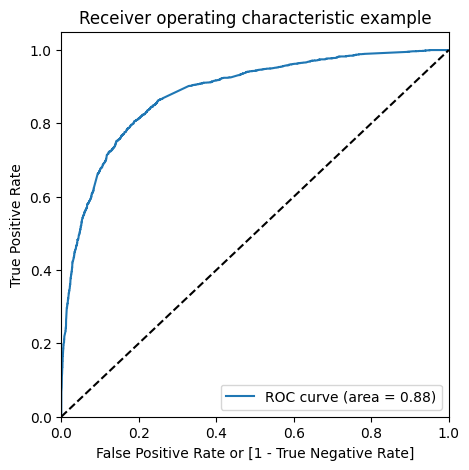

In [454]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [455]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.110512,2250,0,1,1,0,0,0,0,0,0,0,0
1,1,0.614249,6895,1,1,1,1,1,1,1,1,0,0,0
2,1,0.688281,2198,1,1,1,1,1,1,1,1,0,0,0
3,0,0.153339,4046,0,1,1,0,0,0,0,0,0,0,0
4,1,0.161372,1611,0,1,1,0,0,0,0,0,0,0,0


In [456]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379833  1.000000  0.000000
0.1   0.1  0.587975  0.970503  0.353690
0.2   0.2  0.746568  0.906523  0.648601
0.3   0.3  0.798327  0.837973  0.774046
0.4   0.4  0.811898  0.777732  0.832824
0.5   0.5  0.813950  0.695056  0.886768
0.6   0.6  0.798485  0.587869  0.927481
0.7   0.7  0.783020  0.507686  0.951654
0.8   0.8  0.761875  0.420440  0.970992
0.9   0.9  0.712640  0.263814  0.987532


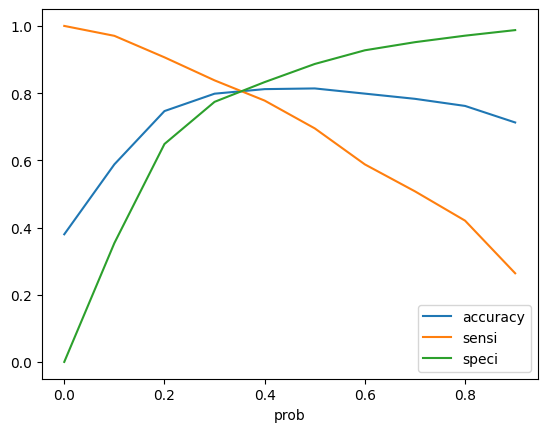

In [457]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [458]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.110512,2250,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.614249,6895,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.688281,2198,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.153339,4046,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.161372,1611,0,1,1,0,0,0,0,0,0,0,0,0


In [459]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.110512,2250,0,1,1,0,0,0,0,0,0,0,0,0,11
1,1,0.614249,6895,1,1,1,1,1,1,1,1,0,0,0,1,61
2,1,0.688281,2198,1,1,1,1,1,1,1,1,0,0,0,1,69
3,0,0.153339,4046,0,1,1,0,0,0,0,0,0,0,0,0,15
4,1,0.161372,1611,0,1,1,0,0,0,0,0,0,0,0,0,16


#### Instead of choosing an arbitrary cutoff of 0.5 we can choose 0.34 instead

In [460]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.110512,2250,0,1,1,0,0,0,0,0,0,0,0,0,11
1,1,0.614249,6895,1,1,1,1,1,1,1,1,0,0,0,1,61
2,1,0.688281,2198,1,1,1,1,1,1,1,1,0,0,0,1,69
3,0,0.153339,4046,0,1,1,0,0,0,0,0,0,0,0,0,15
4,1,0.161372,1611,0,1,1,0,0,0,0,0,0,0,0,0,16


In [461]:
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

sensitivity = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted, pos_label=1)

specificity = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted, pos_label=0)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.8041660091525958
Sensitivity: 0.8188616535105941
Specificity: 0.7951653944020356


### All of our metric have been improved

# Making predicitons

In [463]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [464]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,Specialization_Others,Specialization_Retail Management,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2466,0,-0.534986,0,0,0,0,0,0,0,0,1,0,0,0,0
3099,0,-0.496435,1,0,0,0,0,0,0,0,0,0,0,1,0
4394,0,-0.239428,1,0,0,0,1,0,0,0,0,0,0,0,0
7609,0,-0.878274,0,1,0,0,1,0,0,0,1,0,0,0,0
6455,0,0.034101,1,0,0,0,0,0,0,0,0,0,0,1,0


In [465]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2466    0.083532
3099    0.408986
4394    0.174467
7609    0.226026
6455    0.548928
7517    0.556929
8790    0.918201
3018    0.135275
7597    0.015085
8346    0.112635
dtype: float64

In [466]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)


In [467]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8276199804113614
Specificity : 0.7877358490566038


In [471]:
res.params.sort_values(ascending=False)


Lead Source_Welingak Website                            5.806577
Lead Source_Reference                                   3.230210
What is your current occupation_Working Professional    2.413723
Last Notable Activity_Unreachable                       2.253352
Last Notable Activity_SMS Sent                          1.937361
Last Activity_Had a Phone Conversation                  1.549410
Last Activity_Unsubscribed                              1.095658
Total Time Spent on Website                             1.064020
Lead Source_Olark Chat                                  1.051912
Last Activity_Email Opened                              0.477764
const                                                  -0.637270
Specialization_Retail Management                       -0.755163
Last Activity_Olark Chat Conversation                  -1.112067
Lead Origin_Landing Page Submission                    -1.140034
Specialization_Others                                  -1.188794
Do Not Email             

# Conclusion

1. Lead sources from Welingak websites are important to purses
2. Lead source from references are also impactful
3. Professionals, people who had phone conversation and were unreachable sources should be pursued

4. Less focus on Retail Managemenet, Other Specialization and people who use the do not email option